In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sym
from sympy import oo
sym.init_printing()



def fourier_transform(x):
    return sym.transforms._fourier_transform(x, t, w, 1, -1, 'Fourier')
    #return sym.integrate(x*sym.exp(-1j*w*t), (t,0,oo)).evalf()

## Definición

La [transformada de Fourier](https://en.wikipedia.org/wiki/Fourier_transform) está definida por

\begin{equation}
X(j \omega) = \int_{-\infty}^{\infty} x(t) \, e^{-j \omega t} \; dt
\end{equation}

donde $X(j \omega) = \mathcal{F} \{ x(t) \}$ se usa como notación de la Transformada de Fourier de la señal $x(t)$. $X(j \omega)$ es el espectro de la señal $x(t)$. El argumento $j \omega$, como exponente de la exponencial, encierra el comportamiento de todas las señales oscilatorias $cos(\omega t)$.

Observe que la forma de la transformada de Fourier corresponde a la forma de la correlación. De esta manera, podría interpretarse como el "parecido" entre la señal $x(t)$ y  $e^{j \omega t}$, es decir entre $x(t)$ y $cos(\omega t)$


La transformada inversa de Fourier $x(t) = \mathcal{F}^{-1} \{ X(j \omega) \}$ se define como

\begin{equation}
x(t) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} X(j \omega) \, e^{j \omega t} \; d\omega
\end{equation}


## Propiedades

### Invertible

\begin{equation}
x(t) = \mathcal{F}^{-1} \left\{ \mathcal{F} \{ x(t) \} \right\}
\end{equation}

Tomando las expresiones de la Transformada de Fourier y la Transformada Inversa de Fourier, se obtiene:

\begin{equation}
\begin{split}
x(t) &= \frac{1}{2 \pi} \int_{-\infty}^{\infty} \underbrace{\int_{-\infty}^{\infty} x(\tau) e^{-j \omega \tau} d\tau}_{X(j \omega)} \; e^{j \omega t} d\omega \\
&= \int_{-\infty}^{\infty} x(\tau) \left( \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{-j \omega \tau} e^{j \omega t}  d\omega \right) d\tau \\
&= \int_{-\infty}^{\infty} x(\tau) \delta(t - \tau) d\tau = x(t)
\end{split}
\end{equation}

### Linealidad

\begin{equation}
\mathcal{F} \{ A \cdot x_1(t) + B \cdot x_2(t) \} = A \cdot X_1(j \omega) + B \cdot X_2(j \omega)
\end{equation}

Tomando la expresión de la Transformada de Fourier se obtiene:


\begin{equation}
\begin{split}
&= \int_{-\infty}^{\infty} (A \cdot x_1(t) + B \cdot x_2(t)) \, e^{-j \omega t} \; dt \\
&= \int_{-\infty}^{\infty} A \cdot x_1(t) \, e^{-j \omega t} \; dt + \int_{-\infty}^{\infty} B \cdot x_2(t) \, e^{-j \omega t} \; dt \\
&= A \cdot \int_{-\infty}^{\infty} x_1(t) \, e^{-j \omega t} \; dt + B \cdot\int_{-\infty}^{\infty} x_2(t) \, e^{-j \omega t} \; dt
\end{split}
\end{equation}


**Ejemplo - Transformada de Fourier de una señal exponencial causal**


\begin{equation}
x(t) = e^{- \alpha t} \cdot \epsilon(t)
\end{equation}

con $\alpha \in \mathbb{R}^+$ 

In [2]:
t,w = sym.symbols('t omega', real=True)
a = 4
x = sym.exp(-a * t)*sym.Heaviside(t)
x

In [3]:
X = fourier_transform(x)
X

C:\Users\Usuario\.conda\envs\SyS\lib\site-packages\sympy\__init__.py:676: SymPyDeprecationWarning: 

importing sympy.integrals.transforms with 'from sympy import *' has
been deprecated since SymPy 1.6. Use import sympy.integrals.transforms
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  deprecated_since_version="1.6").warn()


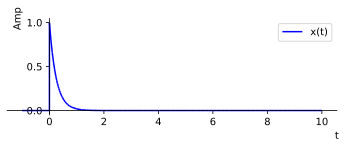

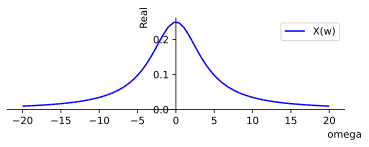

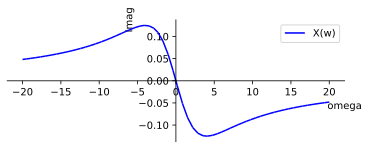

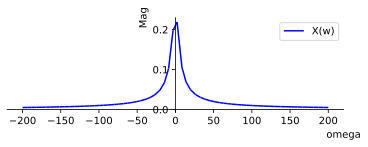

In [25]:
plt.rcParams['figure.figsize'] = 5, 2
sym.plot(x, (t,-1,10), ylabel=r'Amp',line_color='blue',legend=True, label = 'x(t)')
sym.plot(sym.re(X), (w,-20,20), ylabel=r'Real',line_color='blue',legend=True, label = 'X(w)')
sym.plot(sym.im(X), (w,-20,20), ylabel=r'Imag',line_color='blue',legend=True, label = 'X(w)')

sym.plot(sym.sqrt(
         (sym.im(X)*sym.im(X)) + (sym.re(X)*sym.re(X))),
         (w,-200,200), ylabel=r'Mag',line_color='blue',legend=True, label = 'X(w)')



Observe que:

- $X(\omega)$ es una función definida para todos los valores de $\omega$ y no solamente para los múltiplos enteros de un valor determinado $\omega_0$.

- $X(\omega)$ es una función compleja, es decir que tiene parte imaginaria y parte real. Así, puede expresarse de forma cartesiana ($real + j \cdot imaginario$) o de forma polar ($magnitud \angle ángulo$). El "parecido" entre la señal $x(t)$ con $sin(\omega t)$ se puede apreciar en la magnitud de $X(\omega)$.

- $|X(\omega)|$ tiene un valor máximo en $\omega=0$ y un decaimiento a medida que aumenta $\omega$



Analizando la magnitud de $X(\omega)$

In [5]:
X

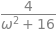

In [6]:
X_real  = sym.re(X)
X_real

In [7]:
X_imag  = sym.im(X)
X_imag

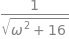

In [8]:
X_magn = sym.sqrt(X_real*X_real + X_imag*X_imag).simplify()
X_magn

La magnitud de $X(\omega)$ es simétrica respecto a $\omega = 0$. Así, será suficiente analizar solamente un lado del espectro de una señal de tiempo continuo.

**Ejemplo - Transformada de Fourier de una señal exponencial por una senoidal**


\begin{equation}
x(t) = sin(\omega_0 t) \cdot e^{- \alpha t} \cdot \epsilon(t)
\end{equation}

con $\omega \in \mathbb{R}^+$ 

In [30]:
t,w = sym.symbols('t omega', real=True)
w0 = 10
x1 = sym.sin(w0 * t)*sym.exp(-a*t)*sym.Heaviside(t)
x1

C:\Users\Usuario\.conda\envs\SyS\lib\site-packages\sympy\__init__.py:676: SymPyDeprecationWarning: 

importing sympy.integrals.transforms with 'from sympy import *' has
been deprecated since SymPy 1.6. Use import sympy.integrals.transforms
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  deprecated_since_version="1.6").warn()


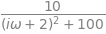

In [31]:
X1 = fourier_transform(x1)
X1

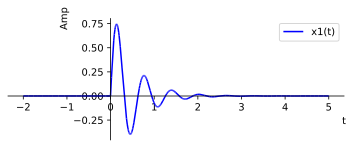

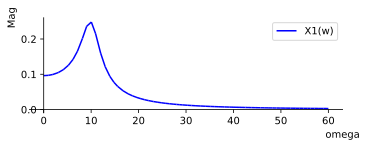

In [32]:
plt.rcParams['figure.figsize'] = 5, 2
sym.plot(x1, (t,-2,5), ylabel=r'Amp',line_color='blue',legend=True, label = 'x1(t)')
#sym.plot(sym.re(X), (w,-20,20), ylabel=r'Real',line_color='blue',legend=True, label = 'X(w)')
#sym.plot(sym.im(X), (w,-20,20), ylabel=r'Imag',line_color='blue',legend=True, label = 'X(w)')

sym.plot(sym.sqrt(
         (sym.im(X1)*sym.im(X1)) + (sym.re(X1)*sym.re(X1))),
         (w,0,60), ylabel=r'Mag',line_color='blue',legend=True, label = 'X1(w)')



Observe que:
- $x1(t)$ corresponde a $x(t)$ multiplicada con una función senoidal de frecuencia angular de $10$ rad/seg.

- Al igual que con la magnitud de $X(\omega)$, la magnitud de $X1(\omega)$ decae con $\omega$, sin embargo, hay un pico en $\omega=10$ que se relaciona con la senoidal.


**Ejemplo - Transformada de Fourier de senoidales y combinaciones causales**



\begin{equation}
x(t) = sin(\omega_0 t) \cdot \epsilon(t)
\end{equation}

con $\omega \in \mathbb{R}^+$ 

In [33]:
w1 = 10
w2 = 5
x2_1 = sym.sin(w1 * t)*sym.Heaviside(t)

x2_2 = sym.sin(w2 * t)*sym.Heaviside(t)


x2 = x2_1 + x2_2
x2

C:\Users\Usuario\.conda\envs\SyS\lib\site-packages\sympy\__init__.py:676: SymPyDeprecationWarning: 

importing sympy.integrals.transforms with 'from sympy import *' has
been deprecated since SymPy 1.6. Use import sympy.integrals.transforms
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  deprecated_since_version="1.6").warn()


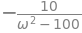

In [34]:
X2_1 = fourier_transform(x2_1)
X2_1


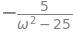

In [35]:
X2_2 = fourier_transform(x2_2)
X2_2

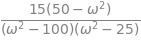

In [36]:
(X2_1+X2_2).simplify()

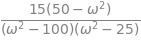

In [37]:
X2 = fourier_transform(x2)
X2

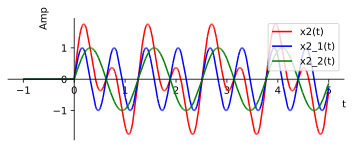

In [17]:
plt.rcParams['figure.figsize'] = 5, 2
gt2_1 = sym.plot(x2_1, (t,-1,5), ylabel=r'Amp',line_color='blue',legend=True, label = 'x2_1(t)', show = False)
gt2_2 = sym.plot(x2_2, (t,-1,5), ylabel=r'Amp',line_color='green',legend=True, label = 'x2_2(t)', show = False)
gt2 = sym.plot(x2, (t,-1,5), ylabel=r'Amp',line_color='red',legend=True, label = 'x2(t)', show = False)
gt2.extend(gt2_1)
gt2.extend(gt2_2)
gt2.show()



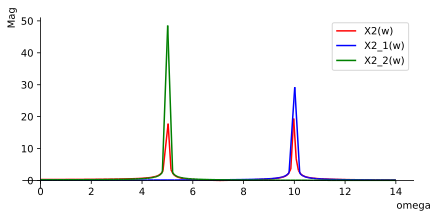

In [42]:

plt.rcParams['figure.figsize'] = 6, 3

gw2_1 = sym.plot(sym.sqrt(
         (sym.im(X2_1)*sym.im(X2_1)) + (sym.re(X2_1)*sym.re(X2_1))),
         (w,0,14), ylabel=r'Mag',line_color='blue',legend=True, label = 'X2_1(w)',show = False)
gw2_2 = sym.plot(sym.sqrt(
         (sym.im(X2_2)*sym.im(X2_2)) + (sym.re(X2_2)*sym.re(X2_2))),
         (w,0,14), ylabel=r'Mag',line_color='green',legend=True, label = 'X2_2(w)',show = False)
gw2 = sym.plot(sym.sqrt(
         (sym.im(X2)*sym.im(X2)) + (sym.re(X2)*sym.re(X2))),
         (w,0,14), ylabel=r'Mag',line_color='red',legend=True, label = 'X2(w)',show = False)

gw2.extend(gw2_1)
gw2.extend(gw2_2)
gw2.show()

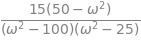

In [40]:
X2

En la gráfica anterior se observa el efecto de la superposición lineal de los espectros de las dos señales senoidales.

**Ejercicio**

Analice el espectro de

\begin{equation}
x(t) = (sin(\omega_0 t) + e^{-2t}) \cdot \epsilon(t)
\end{equation}

con $\omega_0 \in \mathbb{R}^+$ 


In [43]:
t,w = sym.symbols('t omega', real=True)
w0 = 15
a = 2
x4 = (sym.sin(w0 * t) + sym.exp(-a*t))*sym.Heaviside(t)
x4

### Dualidad

Observe que la **Transformada de Fourier** y la **Transformada Inversa de Fourier** tienen formas parecidas.

\begin{align}
X(\omega) &= \int_{-\infty}^{\infty} x(t) \, e^{-j \omega t} \; dt \\
x(t) &= \frac{1}{2 \pi} \int_{-\infty}^{\infty} X(j \omega) \, e^{j \omega t} \; d\omega
\end{align}

La principal diferencia está en el factor de normalización $2 \pi$ y el signo de la exponencial.

Suponga que:

\begin{equation}
x_2(\omega) = \mathcal{F} \{ x_1(t) \}
\end{equation}

Puede pensarse que: 

\begin{equation}
x_2(t) = x_2(\omega) \big\vert_{\omega=t}
\end{equation}

Entonces

\begin{equation}
\mathcal{F} \{ x_2(t) \} = \int_{-\infty}^{\infty} x_2(\omega) \big\vert_{\omega=t} \, e^{-j \omega t} \; dt
\end{equation}

Esta tiene la forma de **Transformada de Fourier**, pero la función interna tiene a $\omega$ como variable, esto indica que la integral se trata como una **Transformada inversa**.  Así, para volver a la **Transformada de Fourier**, se debe multiplicar por $2\pi$ y quitar el signo de la exponencial del kernel de transformación.

\begin{equation}
\mathcal{F} \{ x_2(t) \} = 2 \pi \cdot x_1(- \omega)
\end{equation}

Esta propiedad permite llevar los análisis desde el dominio de las frecuencias al dominio del tiempo y viceversa.

## Teoremas

Retomando la transformada

\begin{equation}
X(j \omega) = \int_{-\infty}^{\infty} x(t) \, e^{-j \omega t} \; dt
\end{equation}

### Derivadas

Dadas una señal $x(t)$ y su derivada respecto al tiempo $\frac{d x(t)}{dt}$, y conocida la **Transformada de Fourier** $X(\omega)$ :


\begin{equation}
\mathcal{F} \left\{ \frac{d x(t)}{dt} \right\}  = \int_{-\infty}^{\infty} \frac{d x(t)}{dt} \, e^{-j \omega t} \; dt
\end{equation}

La integral se puede resolver por partes:

\begin{equation}
\begin{split}
\mathcal{F} \left\{ \frac{d x(t)}{dt} \right\} &= x(t) \cdot e^{-j \omega t} \big\vert_{-\infty}^{\infty} - \int_{-\infty}^{\infty} x(t) (-j \omega) e^{-j \omega t} \; dt \\
&= j \omega \int_{-\infty}^{\infty} x(t) e^{-j \omega t} \; dt \\
&= j \omega X(\omega) \
\end{split}
\end{equation}

\begin{equation}
\frac{d x(t)}{dt} = \frac{d \delta(t)}{dt} * x(t)
\end{equation}


La principal aplicación está en la transformación de ecuaciones diferenciales.

** Ejemplo**

\begin{equation}
2y(t) + 2 \frac{dy}{dt} - x(t) = 0 
\end{equation}

Aplicando la **Transformada de Fourier** con sus propiedades se obtiene:
\begin{equation}
2Y(\omega) + 2 j \omega Y(\omega) - X(\omega) = 0 
\end{equation}

Observe que en el modelo en el dominio del tiempo (ecuación diferencial) no es posible despejar una expresión equivalente a $\frac{x(t)}{y(t)}$. Por su parte, usando el modelo en el dominio de la frecuencia, se obtiene:


\begin{equation}
Y(\omega)(2 + 2 j \omega ) = X(\omega) 
\end{equation}

\begin{equation}
\frac{Y(\omega)}{X(\omega)} = \frac{1}{2+2j\omega} = F(\omega)
\end{equation}

Esta relación es conocida como **Función de transferencia** y representa el efecto que tiene el sistema sobre una señal de entrada que en el caso de la transformada de Fourier es senoidal.



In [44]:
# La función de transferencia
F = 1 / (2 +1j*2*w  )

F

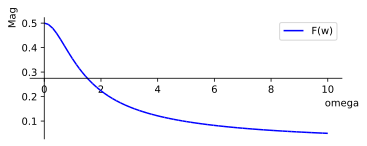

In [45]:
plt.rcParams['figure.figsize'] = 5, 2
sym.plot(sym.Abs(F), (w,0,10), ylabel=r'Mag',line_color='blue',legend=True, label = 'F(w)', show = True)


La respuesta de un sistema ante una entrada senoidal de frecuencia específica $\omega$ se determina por el valor complejo que toma $F(\omega)$. Por ejemplo, en la frecuencia $\omega = 1$, $F(1) = \frac{1}{2+2j}$

In [22]:
F1 = F.subs(w,1)
F1


In [23]:
magF1 = sym.Abs(F1)
magF1

Así, si el sistema es excitado con un seno de frecuencia 1, con amplitud 1, la salida será un seno de amplitud 0.35 y tendrá un desfase definido por el ángulo de la función de transferencia.

\begin{equation}
0.35 sin(1t + ang)
\end{equation}

### Ejercicio

Realice una búsqueda o deduzca cómo se calcula el ángulo de fase que introduce el sistema.